# House Price prediction in KSA


In [ ]:
#Import Libraries
import pandas as pd
from pandas.plotting import andrews_curves
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import KFold
from sklearn import metrics
from statsmodels.tools.eval_measures import mse
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.exceptions import ConvergenceWarning
import math
import warnings
from scipy import stats
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE



# Load dataset

In [ ]:
#Load data
df =pd.read_csv('SA_Aqar 1.csv')

In [ ]:
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,0.0,1,0,1,1,0.0,0,80000
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,0.0,1,0,0,1,0.0,0,60000
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,0,1,0.0,1,0,0,1,0.0,0,60000
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,0.0,1,0,0,0,0.0,0,55000
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,0,1,0.0,1,0,1,1,0.0,0,70000


In [ ]:
df.shape

(3718, 23)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
size,3718.0,390.968531,1565.056135,1.0,280.0,330.0,400.0,95000.0
property_age,3718.0,5.064820,7.590427,0.0,0.0,2.0,7.0,36.0
bedrooms,3718.0,5.083916,1.230040,1.0,4.0,5.0,6.0,7.0
bathrooms,3718.0,4.606509,0.703449,1.0,4.0,5.0,5.0,5.0
livingrooms,3718.0,2.243948,0.916436,1.0,2.0,2.0,3.0,5.0
kitchen,3718.0,0.909360,0.287135,0.0,1.0,1.0,1.0,1.0
garage,3718.0,0.802044,0.398512,0.0,1.0,1.0,1.0,1.0
driver_room,3718.0,0.495697,0.500049,0.0,0.0,0.0,1.0,1.0
maid_room,3718.0,0.795320,0.403522,0.0,1.0,1.0,1.0,1.0
furnished,3718.0,0.123453,0.329001,0.0,0.0,0.0,0.0,1.0


# Visualization

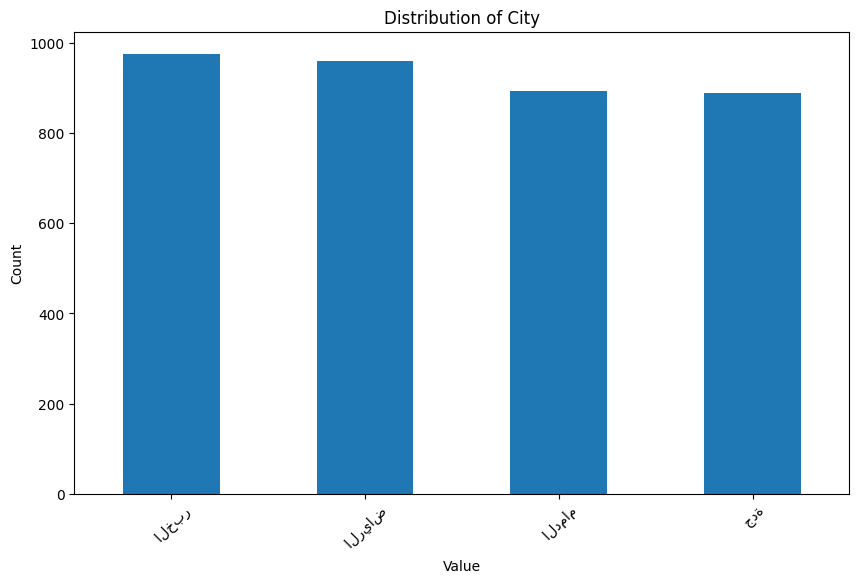


Value Counts for City:
city
 الخبر     976
 الرياض    960
 الدمام    894
 جدة       888
Name: count, dtype: int64


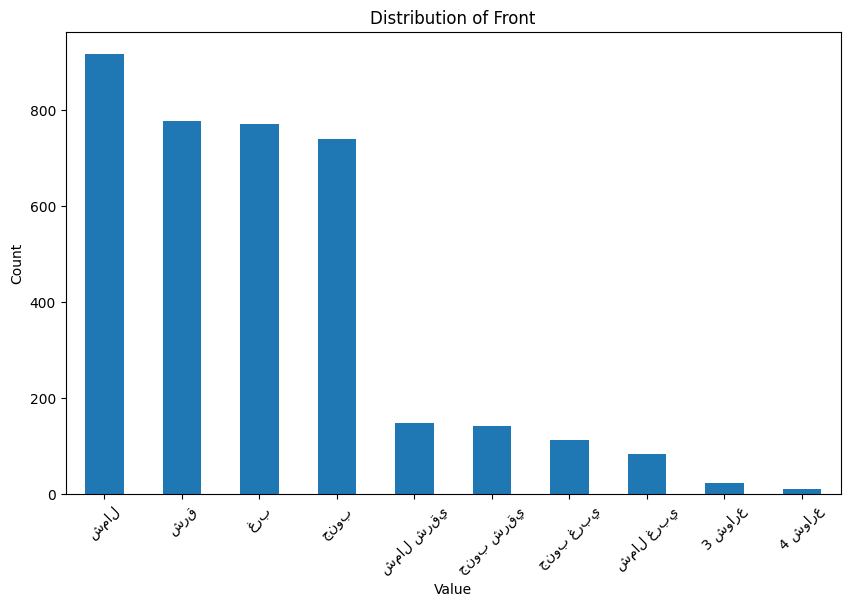


Value Counts for Front:
front
شمال         917
شرق          776
غرب          771
جنوب         739
شمال شرقي    147
جنوب شرقي    141
جنوب غربي    112
شمال غربي     83
3 شوارع       23
4 شوارع        9
Name: count, dtype: int64


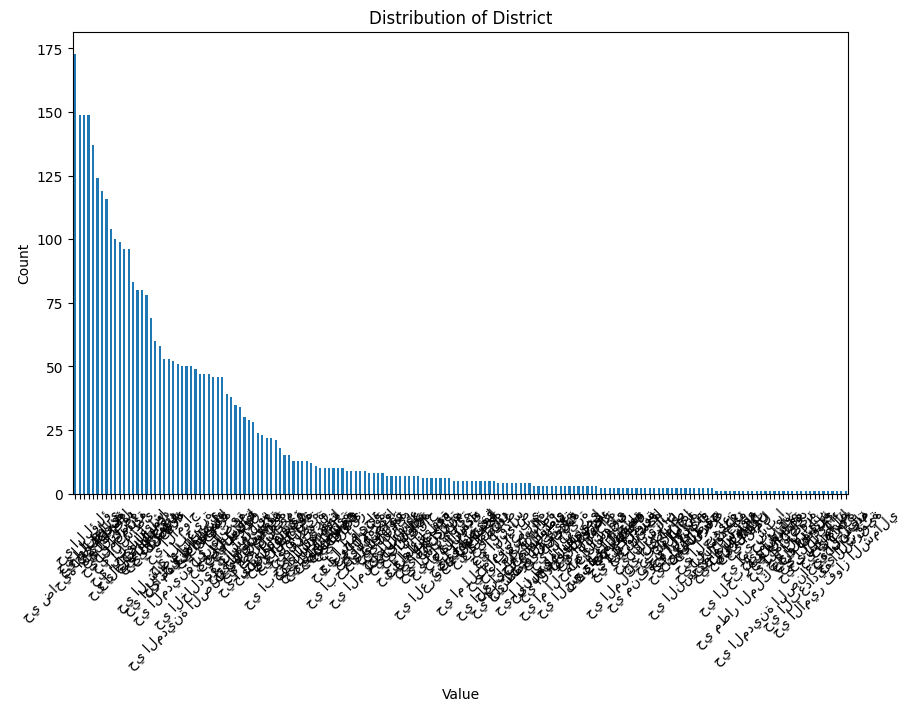


Value Counts for District:
district
   حي ضاحية الملك فهد         173
   حي اللؤلؤ                  149
   حي الصواري                 149
   حي التحلية                 149
   حي العارض                  137
                             ... 
   حي مريخ                      1
   حي الامير فواز الشمالي       1
   حي السلام                    1
   حي لبن                       1
   حي الثقبة                    1
Name: count, Length: 174, dtype: int64


In [ ]:
 #Define the feature names and their corresponding value counts
feature_value_counts = {
    'City': df['city'].value_counts(),
    'Front': df['front'].value_counts(),
    'District': df['district'].value_counts()
}

# Plot and print the distribution for each feature
for feature, value_counts in feature_value_counts.items():
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f"Distribution of {feature}")
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    # Print the value counts
    print(f"\nValue Counts for {feature}:")
    print(value_counts)

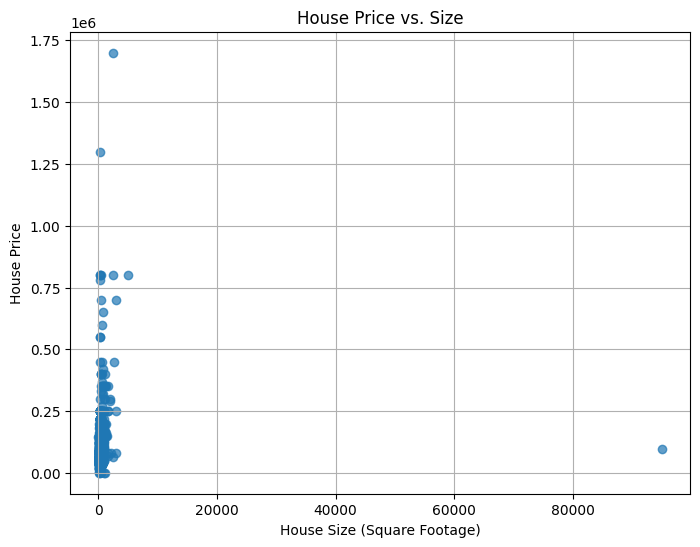

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['size'], df['price'], alpha=0.7)
plt.xlabel('House Size (Square Footage)')
plt.ylabel('House Price')
plt.title('House Price vs. Size')
plt.grid(True)

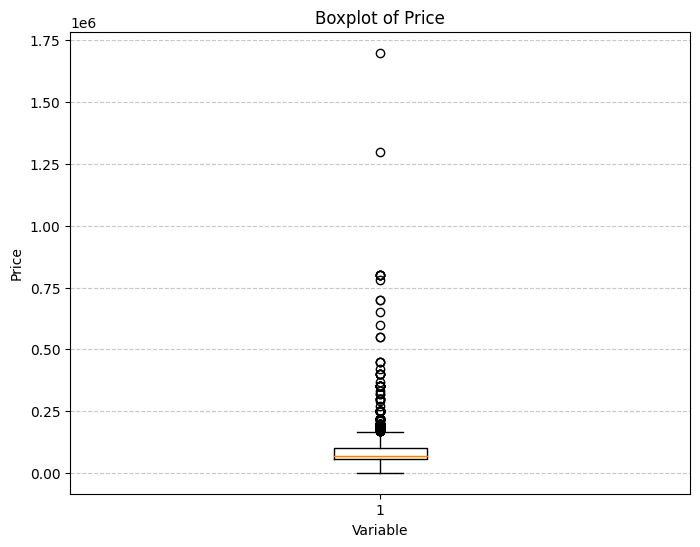

In [ ]:
# Plot the boxplot for 'price'
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'])
plt.title("Boxplot of Price")
plt.xlabel("Variable")
plt.ylabel("Price")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Missing Data Profile:
city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool            25
frontyard        0
basement         0
duplex           0
stairs           0
elevator        10
fireplace        0
price            0
dtype: int64


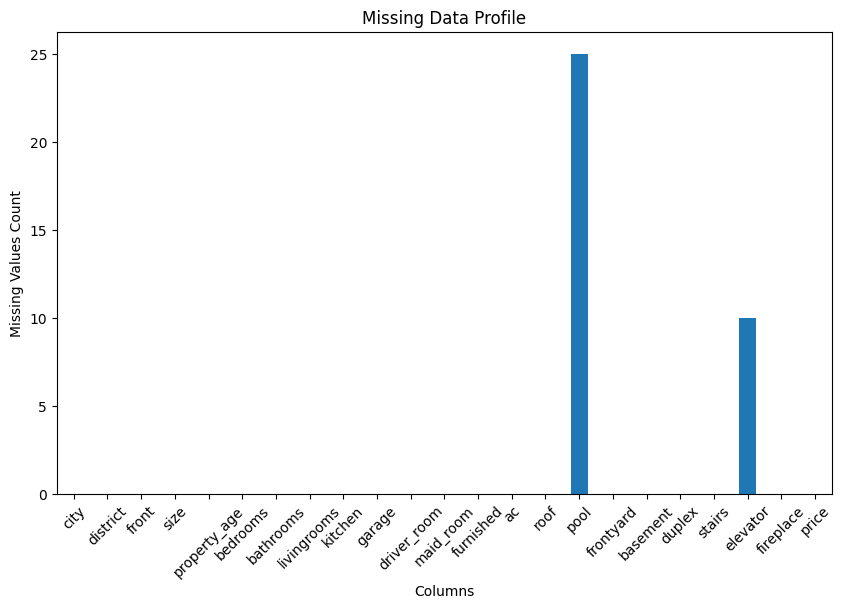

Text(0, 0.5, 'Percentage of Missing Data')

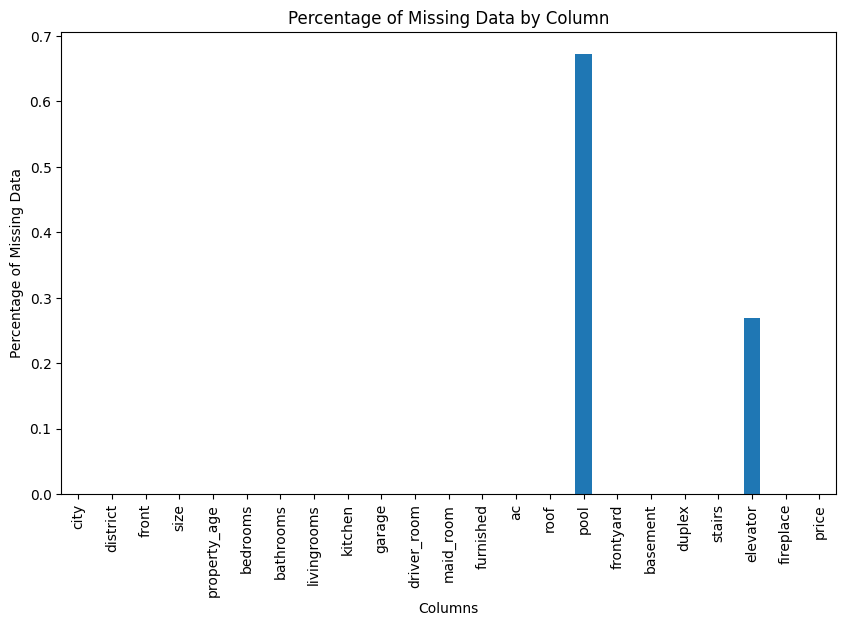

In [ ]:
 #1. profiling Missing Data

missing_data = df.isnull().sum()
print("Missing Data Profile:")
print(missing_data)

plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar')
plt.title("Missing Data Profile")
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=45)
plt.show()

missing_data_percentage = (df.isnull().sum() / len(df)) * 100
missing_data_percentage.plot(kind='bar', figsize=(10, 6))
plt.title("Percentage of Missing Data by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Data")

# Data Preproccessing

## 1. Full missing value

<Axes: >

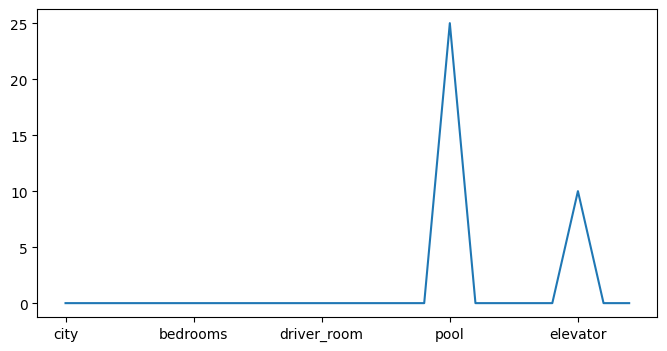

In [ ]:
plt.figure(figsize=(8,4))
df.isnull().sum().plot()

In [ ]:
#fill missing value
df['pool'].fillna(df['pool'].mean(),inplace=True)
df['elevator'].fillna(df['elevator'].mean(),inplace=True)

In [ ]:
# check if there is a missing value
df.isnull().sum()

city            0
district        0
front           0
size            0
property_age    0
bedrooms        0
bathrooms       0
livingrooms     0
kitchen         0
garage          0
driver_room     0
maid_room       0
furnished       0
ac              0
roof            0
pool            0
frontyard       0
basement        0
duplex          0
stairs          0
elevator        0
fireplace       0
price           0
dtype: int64

# 2. Handling Catogorical Variable

In [ ]:
df['city'].unique()

array([' الرياض', ' جدة', ' الدمام', ' الخبر'], dtype=object)

In [ ]:
df['front'].unique()

array(['شمال', 'جنوب', 'غرب', 'شرق', 'جنوب شرقي', 'جنوب غربي',
       'شمال غربي', 'شمال شرقي', '3 شوارع', '4 شوارع'], dtype=object)

In [ ]:
df['district'].unique()

array(['   حي العارض ', '   حي القادسية ', '   حي المعيزلة ',
       '   حي العليا ', '   حي الازدهار ', '   حي المهدية ',
       '   حي الحزم ', '   حي الصحافة ', '   حي بنبان ',
       '   حي النسيم الغربي ', '   حي النرجس ', '   حي الملز ',
       '   حي الياسمين ', '   حي المونسية ', '   حي السليمانية ',
       '   حي العقيق ', '   حي المرسلات ', '   حي الرحمانية ',
       '   حي الرمال ', '   حي طويق ', '   حي الملقا ', '   حي النزهة ',
       '   حي الربيع ', '   حي ظهرة لبن ', '   حي الروضة ', '   حي عكاظ ',
       '   حي الورود ', '   حي الفيحاء ', '   حي النموذجية ',
       '   حي الربوة ', '   حي القيروان ', '   حي عليشة ',
       '   حي الملك فيصل ', '   حي حطين ', '   حي المناخ ',
       '   حي البديعة ', '   حي الشهداء ', '   حي قرطبة ',
       '   حي العريجاء الغربية ', '   حي النفل ', '   حي القدس ',
       '   حي الملك فهد ', '   حي العزيزية ', '   حي الواحة ',
       '   حي النسيم الشرقي ', '   حي المصيف ', '   حي الزهرة ',
       '   حي اليرموك ', '   حي الملك عبدالله

In [ ]:
# use Ordinal ecoder to encode city
enc = OrdinalEncoder()

In [ ]:
enc.fit_transform(df[['city']])


array([[2.],
       [2.],
       [2.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
df[['city']]=enc.fit_transform(df[['city']])

In [ ]:
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,2.0,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,0.0,1,0,1,1,0.0,0,80000
1,2.0,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,0.0,1,0,0,1,0.0,0,60000
2,2.0,حي القادسية,جنوب,380,0,4,5,1,1,1,...,0,1,0.0,1,0,0,1,0.0,0,60000
3,2.0,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,0.0,1,0,0,0,0.0,0,55000
4,2.0,حي العليا,غرب,400,11,7,5,2,1,1,...,0,1,0.0,1,0,1,1,0.0,0,70000


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['front'] = label_encoder.fit_transform(df['front'])
df['district'] = label_encoder.fit_transform(df['district'])


In [ ]:
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,2.0,79,6,250,0,5,5,1,1,1,...,0,0,0.0,1,0,1,1,0.0,0,80000
1,2.0,92,2,370,0,4,5,2,1,1,...,0,0,0.0,1,0,0,1,0.0,0,60000
2,2.0,92,2,380,0,4,5,1,1,1,...,0,1,0.0,1,0,0,1,0.0,0,60000
3,2.0,109,9,250,0,5,5,3,0,1,...,0,0,0.0,1,0,0,0,0.0,0,55000
4,2.0,86,9,400,11,7,5,2,1,1,...,0,1,0.0,1,0,1,1,0.0,0,70000


# Outlier Detection & removal

<Axes: xlabel='price', ylabel='Density'>

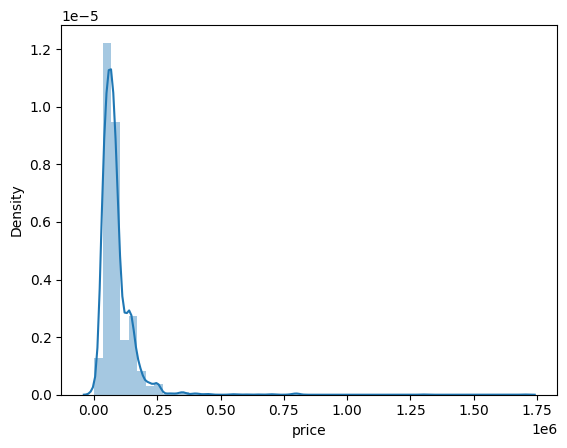

In [ ]:
# to remove the oulier we have check the skew
sns.distplot(df['price'])

In [ ]:
print(df['price'].describe())

count    3.718000e+03
mean     8.738797e+04
std      7.063470e+04
min      1.000000e+03
25%      5.500000e+04
50%      7.000000e+04
75%      1.000000e+05
max      1.700000e+06
Name: price, dtype: float64


In [ ]:
log_price=np.log1p(df['price'])

<Axes: xlabel='price', ylabel='Density'>

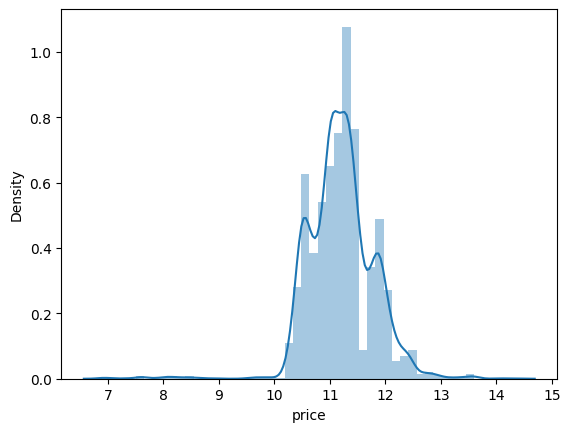

In [ ]:
sns.distplot(log_price)

In [ ]:
print(log_price.quantile(0.10),log_price.quantile(0.95))

10.518700218288165 12.100717685412471


In [ ]:
z_score = np.abs(stats.zscore(log_price))

In [ ]:
np.where(z_score>3)

(array([ 131,  168,  257,  272,  307,  321,  394,  417,  490,  535,  761,
         773,  779,  787,  801,  831,  858,  901,  917,  934,  950, 1100,
        1116, 1149, 1157, 1161, 1168, 1170, 1192, 1202, 1206, 1225, 1250,
        1255, 1263, 1323, 1371, 1913, 1953, 1971, 1974]),)

In [ ]:
remove_outliers = df.loc[z_score<=3]

In [ ]:
print('old data', len(df))
print('new data', len(remove_outliers))
print('Ourlires' , len(df)-len(remove_outliers))

old data 3718
new data 3677
Ourlires 41


In [ ]:
df = remove_outliers.copy()

In [ ]:
df['log_price'] = log_price

In [ ]:
drop_price =df.drop(['price'], axis=1)

In [ ]:
df = data = drop_price.copy()

In [ ]:
df

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,log_price
0,2.0,79,6,250,0,5,5,1,1,1,...,0,0,0.000000,1,0,1,1,0.0,0,11.289794
1,2.0,92,2,370,0,4,5,2,1,1,...,0,0,0.000000,1,0,0,1,0.0,0,11.002117
2,2.0,92,2,380,0,4,5,1,1,1,...,0,1,0.000000,1,0,0,1,0.0,0,11.002117
3,2.0,109,9,250,0,5,5,3,0,1,...,0,0,0.000000,1,0,0,0,0.0,0,10.915107
4,2.0,86,9,400,11,7,5,2,1,1,...,0,1,0.000000,1,0,1,1,0.0,0,11.156265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,0.0,97,9,437,0,7,5,2,1,1,...,0,1,0.000000,1,0,1,1,0.0,1,11.002117
3714,0.0,77,2,400,0,5,5,3,0,1,...,1,1,0.163282,1,0,1,1,0.0,0,10.915107
3715,0.0,97,9,330,0,6,4,2,1,0,...,0,1,0.163282,1,0,1,0,0.0,1,10.518700
3716,0.0,96,2,300,13,6,5,2,1,1,...,1,0,0.000000,1,0,1,1,0.0,0,11.407576


# Scale the dataset

In [ ]:
# create a scaler object
scaler = MinMaxScaler()

In [ ]:
# fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(df)

In [ ]:
# create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [ ]:
# print the scaled data
df = scaled_df.copy()


In [ ]:
df

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,log_price
0,0.666667,0.456647,0.666667,0.002621,0.000000,0.666667,1.00,0.00,1.0,1.0,...,0.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.512451
1,0.666667,0.531792,0.222222,0.003884,0.000000,0.500000,1.00,0.25,1.0,1.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.427868
2,0.666667,0.531792,0.222222,0.003990,0.000000,0.500000,1.00,0.00,1.0,1.0,...,0.0,1.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.427868
3,0.666667,0.630058,1.000000,0.002621,0.000000,0.666667,1.00,0.50,0.0,1.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.402285
4,0.666667,0.497110,1.000000,0.004200,0.305556,1.000000,1.00,0.25,1.0,1.0,...,0.0,1.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.473190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,0.000000,0.560694,1.000000,0.004590,0.000000,1.000000,1.00,0.25,1.0,1.0,...,0.0,1.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.427868
3673,0.000000,0.445087,0.222222,0.004200,0.000000,0.666667,1.00,0.50,0.0,1.0,...,1.0,1.0,0.163282,1.0,0.0,1.0,1.0,0.0,0.0,0.402285
3674,0.000000,0.560694,1.000000,0.003463,0.000000,0.833333,0.75,0.25,1.0,0.0,...,0.0,1.0,0.163282,1.0,0.0,1.0,0.0,0.0,1.0,0.285733
3675,0.000000,0.554913,0.222222,0.003147,0.361111,0.833333,1.00,0.25,1.0,1.0,...,1.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.547081


#Feature selection


In [ ]:
X=data.drop(['log_price'] , axis=1 )
y=data['log_price']

In [ ]:
# Perform feature selection based on top K features
k = 15 # Select the top 15 features
selector = SelectKBest(f_regression, k=k)
selector.fit(X, y)

SelectKBest(k=15, score_func=<function f_regression at 0x7e89a2170dc0>)

In [ ]:
# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

In [ ]:
# Get the names of the selected features
feature_names = X.columns[selected_features]
print("Selected features: ")
print(feature_names)

Selected features: 
Index(['city', 'district', 'front', 'property_age', 'livingrooms', 'garage',
       'driver_room', 'maid_room', 'furnished', 'ac', 'pool', 'frontyard',
       'basement', 'duplex', 'stairs'],
      dtype='object')


# Splits the dataset


In [ ]:
# Update the data with just the selected features
X_selected = X.iloc[:, selected_features]
y_selected = y

In [ ]:
X = X_selected.copy()
y = y_selected.copy()

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)).mean()
    return rmse


def evaluation(y, predictions):
    r_squared =metrics.r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = math.sqrt(mean_squared_error(y, predictions))
    mae = mean_absolute_error(y, predictions)
    return r_squared, mse, rmse, mae

In [88]:
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)).mean()
    return rmse

def evaluation(y, predictions):
    r_squared = r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = math.sqrt(mean_squared_error(y, predictions))
    mae = mean_absolute_error(y, predictions)
    return r_squared, mse, rmse, mae

In [89]:
models = pd.DataFrame(columns=["Model","R2 Score","MSE","RMSE","MAE" ])


#Random Forest


In [91]:
# Building the model
ran_reg = RandomForestRegressor(n_estimators=42, random_state=100, min_samples_leaf=2, min_samples_split=2)
ran_reg.fit(X_train, y_train)
predictions = ran_reg.predict(X_test)

r_squared, mse, rmse, mae = evaluation(y_test, predictions)
print("R2 Score:", r_squared)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("-" * 30)

new_row = {"Model": "Random Forest", "R2 Score": r_squared, "MSE": mse, "RMSE": rmse, "MAE": mae}
models = models._append(new_row, ignore_index=True)

R2 Score: 0.7903240138476447
MSE: 0.05353162454700265
RMSE: 0.23136902244467095
MAE: 0.10955580717959547
------------------------------


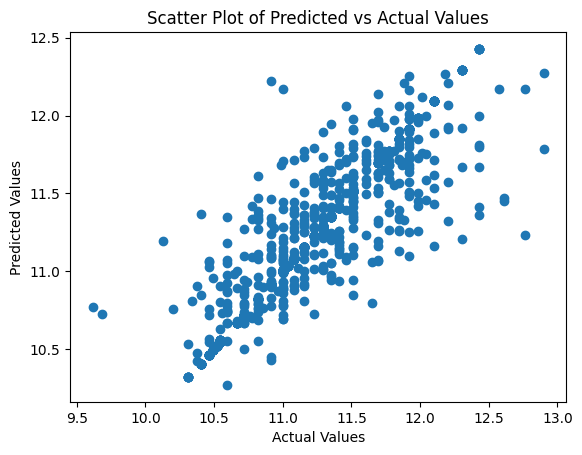

In [92]:
# Create scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

#XGBoost

In [93]:
# Building the model
xgbr = XGBRegressor(learning_rate=0.1, gamma=0.1, n_estimators=100, subsample=0.9, max_depth=8)
xgbr.fit(X_train, y_train)
predictions = xgbr.predict(X_test)

r_squared, mse, rmse, mae = evaluation(y_test, predictions)
print("R2 Score:", r_squared)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("-" * 30)

new_row = {"Model": "XGBoost", "R2 Score": r_squared, "MSE": mse, "RMSE": rmse, "MAE": mae}
models = models._append(new_row, ignore_index=True)

R2 Score: 0.7845491640379192
MSE: 0.05500598075489444
RMSE: 0.2345335386568293
MAE: 0.12451046096088014
------------------------------


#Decision Tree


In [95]:
# Building the model
Dec_reg = DecisionTreeRegressor(max_depth=7, min_samples_split=2, min_samples_leaf=2)
Dec_reg.fit(X_train, y_train)
predictions = Dec_reg.predict(X_test)

r_squared, mse, rmse, mae = evaluation(y_test, predictions)
print("R2 Score:", r_squared)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("-" * 30)

new_row = {"Model": "Decision Tree", "R2 Score": r_squared, "MSE": mse, "RMSE": rmse, "MAE": mae}
models = models._append(new_row, ignore_index=True)

R2 Score: 0.6818075663854917
MSE: 0.08123656982622753
RMSE: 0.2850202972179833
MAE: 0.16610371426148285
------------------------------


In [96]:
models.sort_values(by="R2 Score")


,Model,R2 Score,MSE,RMSE,MAE
2,Decision Tree,0.681808,0.081237,0.285020,0.166104
1,XGBoost,0.784549,0.055006,0.234534,0.124510
0,Random Forest,0.790324,0.053532,0.231369,0.109556


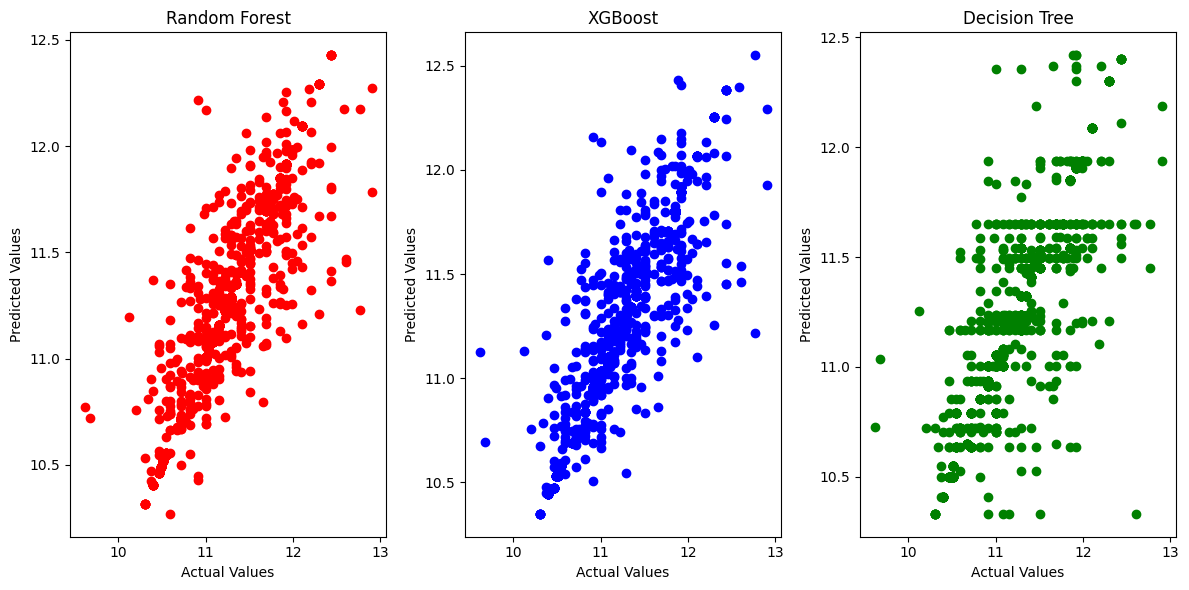

In [97]:
# Create scatter plots
plt.figure(figsize=(12, 6))

# Random Forest
plt.subplot(1, 3, 1)
plt.scatter(y_test, ran_reg.predict(X_test), color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest')

# XGBoost
plt.subplot(1, 3, 2)
plt.scatter(y_test, xgbr.predict(X_test), color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost')

# Decision Tree
plt.subplot(1, 3, 3)
plt.scatter(y_test, Dec_reg.predict(X_test), color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree')

plt.tight_layout()
plt.show()

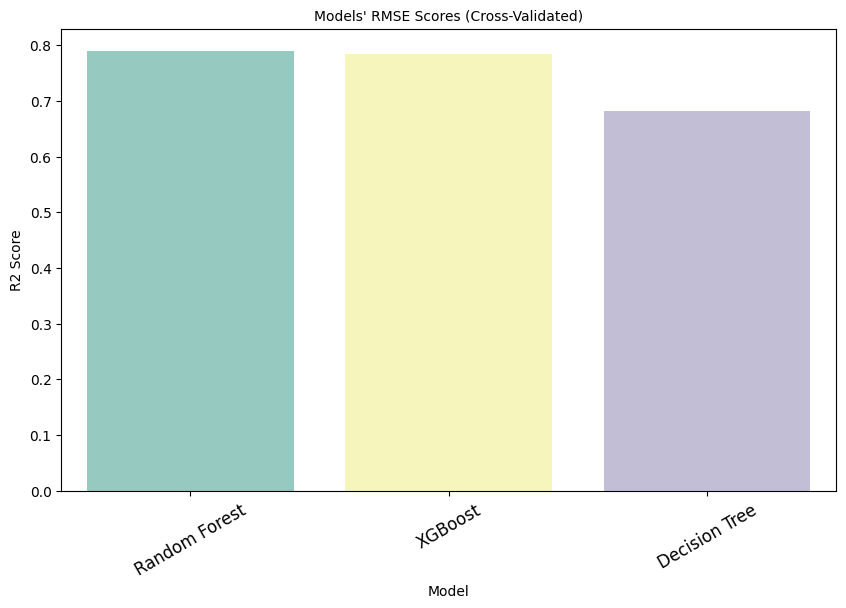

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models["Model"], y=models["R2 Score"], palette="Set3")
plt.title("Models' RMSE Scores (Cross-Validated)", size=10)
plt.xticks(rotation=30, size=12)
plt.show()